# Spatially Exploring Malibu and Toxic Facilities in California 
My partner Antonia and I have chosen to focus on communities and their proximity to toxic facilities, specifically Oxnard and Malibu. First I explored Malibu, looking at it spatially and its building types. Next I explored US EPA Toxic Release Inventory data and mapped the locations of toxic facilities in Los Angeles. Lastly I looked at Malibu again and plotted its nodes and edges and found its centroid. Lastly I looked at the 5,10,15 and 20 min walking distances from the centroid.

## Exploring Malibu Geomoetries and Building Types: 

In [6]:
# to download osm data
import osmnx as ox

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [7]:
# to manipulate data
import pandas as pd

In [8]:
# to manipulate and visualize spatial dataimport geopandas as gpd
import geopandas as gpd

In [9]:
# to provide basemaps import contextily as ctx
import contextily as ctx

In [10]:
import matplotlib.pyplot as plt

In [19]:
address = 'Malibu, Los Angeles, CA'

In [20]:
osm = ox.geometries_from_address(address,tags={'building':True},dist=1000)

In [21]:
osm.shape

(568, 33)

In [40]:
osm.sample(10)

nodes  \
element_type osmid                                                          
way          459111570  [4550251853, 4550271335, 4550276362, 455026833...   
             459111815  [4550275655, 4550257720, 4550263629, 455025509...   
             459111342  [4550251934, 4550255802, 4550276442, 455028080...   
             459111224  [4550258994, 4550275185, 4550283150, 455027674...   
             459112109  [4550270479, 4550275599, 4550257566, 455026336...   
             459110917  [4550272721, 4550277248, 4550269971, 455027519...   
             74501037   [880565912, 880566148, 880566677, 880566582, 8...   
             459111441  [4550277278, 4550259917, 4550266254, 455025708...   
relation     6786519    [[[4550259868, 4550266203, 4550251128, 4550254...   
way          459112353  [4550282158, 4550253169, 4550280334, 455025141...   

                          building                          source  \
element_type osmid                                                   
way          459111570       house                             NaN   
             459111815       house                             NaN   
             459111342       house                             NaN   
             459111224       house                             NaN   
             459112109       house                             NaN   
             459110917       house                             NaN   
             74501037   guardhouse  usgs_imagery_2006;survey;image   
             459111441       house                             NaN   
relation     6786519         house                             NaN   
way          459112353       house                             NaN   

                            source_ref  \
element_type osmid                       
way          459111570             NaN   
             459111815             NaN   
             459111342             NaN   
             459111224             NaN   
             459112109             NaN   
             459110917             NaN   
             74501037   AM909_DSCS6975   
             459111441             NaN   
relation     6786519               NaN   
way          459112353             NaN   

                                                                 geometry  \
element_type osmid                                                          
way          459111570  POLYGON ((-118.69243 34.04195, -118.69241 34.0...   
             459111815  POLYGON ((-118.69653 34.03972, -118.69655 34.0...   
             459111342  POLYGON ((-118.69783 34.03654, -118.69774 34.0...   
             459111224  POLYGON ((-118.68372 34.03142, -118.68379 34.0...   
             459112109  POLYGON ((-118.69797 34.03657, -118.69795 34.0...   
             459110917  POLYGON ((-118.69179 34.04069, -118.69181 34.0...   
             74501037   POLYGON ((-118.68500 34.03904, -118.68501 34.0...   
             459111441  POLYGON ((-118.68655 34.03252, -118.68654 34.0...   
relation     6786519    POLYGON ((-118.68446 34.04110, -118.68443 34.0...   
way          459112353  POLYGON ((-118.68654 34.04358, -118.68654 34.0...   

                          ele height lacounty:ain   lacounty:bld_id name  ...  \
element_type osmid                                                        ...   
way          459111570  104.1    5.0   4458024012      351899838342  NaN  ...   
             459111815   81.9    4.6   4458027002      350657837605  NaN  ...   
             459111342   31.1    4.6   4458021012      350251836380  NaN  ...   
             459111224   11.3    8.2   4452008025      354461834453  NaN  ...   
             459112109   29.9    3.1   4458021013      350223836423  NaN  ...   
             459110917   69.3    3.6   4458025015  2014121188130000  NaN  ...   
             74501037     NaN    NaN          NaN               NaN  NaN  ...   
             459111441    6.9    2.9   4458003023      353652834912  NaN  ...   
relation     6786519     12.5    4.6   4458022021      3542768

In [28]:
osm_building_counts = osm.building.value_counts()

In [42]:
osm_building_counts

house          400
yes             50
commercial      29
industrial      26
retail          25
apartments      18
residential     10
school           3
hotel            3
guardhouse       1
roof             1
greenhouse       1
warehouse        1
Name: building, dtype: int64

In [29]:
df_osm_building_types = pd.DataFrame(osm_building_counts)
df_osm_building_types

,building
house,400
yes,50
commercial,29
industrial,26
retail,25
apartments,18
residential,10
school,3
hotel,3
guardhouse,1


In [30]:
df_osm_building_types = df_osm_building_types.reset_index()
df_osm_building_types

,index,building
0,house,400
1,yes,50
2,commercial,29
3,industrial,26
4,retail,25
5,apartments,18
6,residential,10
7,school,3
8,hotel,3
9,guardhouse,1


In [33]:
df_osm_building_types.columns = ['building_type','count']
df_osm_building_types

,building_type,count
0,house,400
1,yes,50
2,commercial,29
3,industrial,26
4,retail,25
5,apartments,18
6,residential,10
7,school,3
8,hotel,3
9,guardhouse,1


<AxesSubplot:ylabel='building_type'>

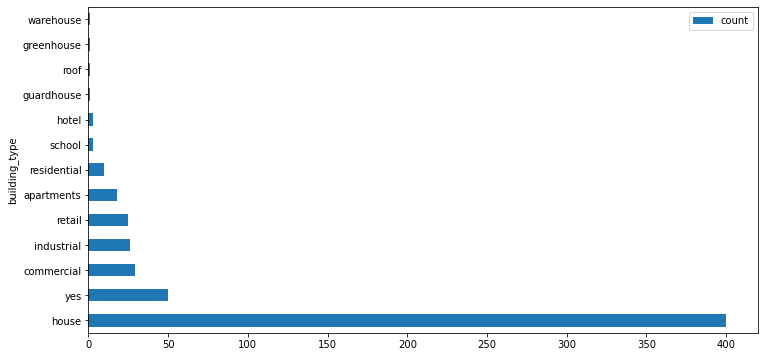

In [46]:
df_osm_building_types.plot.barh(figsize=(12,6),
                                x='building_type')

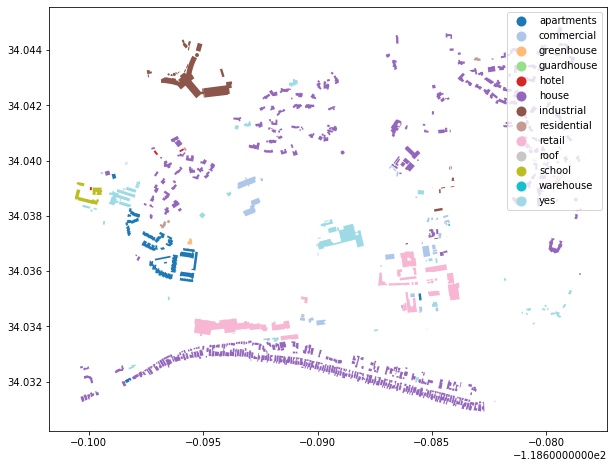

In [47]:
ax = osm.plot(figsize=(10,10),
         column='building',
         cmap='tab20',
         legend=True)

In [41]:
list(osm)

['nodes',
 'building',
 'source',
 'source_ref',
 'geometry',
 'ele',
 'height',
 'lacounty:ain',
 'lacounty:bld_id',
 'name',
 'amenity',
 'brand',
 'brand:wikidata',
 'brand:wikipedia',
 'start_date',
 'addr:city',
 'addr:country',
 'addr:housenumber',
 'addr:postcode',
 'addr:state',
 'addr:street',
 'hazard',
 'man_made',
 'ref',
 'building:units',
 'office',
 'product',
 'tourism',
 'sport',
 'building:use',
 'emergency',
 'ways',
 'type']

## Exploring Data of Toxic Facilities in California

In [25]:
toxic = gpd.read_file('Toxic_Release_Inventory_(TRI)_Facilities.geojson')

<AxesSubplot:>

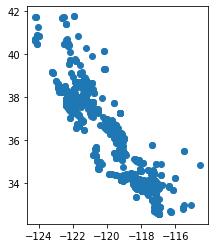

In [26]:
toxic.plot()

Location of toxic facilities in California 

In [12]:
toxic.sample(10)
#sample of toxic facilites 

,FID,originating_system_seq,site_id,facility_name,address,city,state,zip_code,latitude,longitude,fac_point,url,ObjectId,geometry
552,None,2,49839,MOLYCORP MINERALS LLC MOUNTAIN PASS MINE,67693 BAILEY RD,MOUNTAIN PASS,ca,92366,35.471948,-115.528461,None,https://siteportal.calepa.ca.gov/nsite/profile...,553,POINT (-115.52846 35.47195)
2436,None,2,90122,KEYSIGHT TECHNOLOGIES INC,10090 FOOTHILLS BLVD 5748,ROSEVILLE,ca,95747,38.801807,-121.315824,None,https://siteportal.calepa.ca.gov/nsite/profile...,2437,POINT (-121.31582 38.80181)
1578,None,2,23736,DAIRY FARMERS OF AMERICA INC,600 TRADE WAY,TURLOCK,ca,95380,37.486350,-120.881740,None,https://siteportal.calepa.ca.gov/nsite/profile...,1579,POINT (-120.88174 37.48635)
693,None,2,63263,LSC COMMUNICATIONS / TORRANCE,19681 Pacific Gateway Dr,Torrance,ca,90502,33.853668,-118.295891,None,https://siteportal.calepa.ca.gov/nsite/profile...,694,POINT (-118.29589 33.85367)
499,None,2,43931,L&P FINANCIAL SERVICES CO.,1050 S DUPONT AVE,ONTARIO,ca,91761,34.053245,-117.562140,None,https://siteportal.calepa.ca.gov/nsite/profile...,500,POINT (-117.56214 34.05324)
2681,None,2,355200,ROBERTSON'S READY MIX SANTA ANA PLANT 17,310 N TOWNSEND,SANTA ANA,ca,92703,NaN,NaN,None,https://siteportal.calepa.ca.gov/nsite/profile...,2682,None
1140,None,2,117800,FRANZIA WINERY,17000 E HWY 120,RIPON,ca,95366,37.795200,-121.100300,None,https://siteportal.calepa.ca.gov/nsite/profile...,1141,POINT (-121.10030 37.79520)
2692,None,2,355396,CON AGRA FOODS,16429 W KAMM AVE,HELM,ca,93627,36.531580,-120.086090,None,https://siteportal.calepa.ca.gov/nsite/profile...,2693,POINT (-120.08609 36.53158)
1162,None,2,119512,GILLIG,25800 CLAWITER RD,HAYWARD,ca,94545,37.631702,-122.114830,None,https://siteportal.calepa.ca.gov/nsite/profile...,1163,POINT (-122.11483 37.63170)
2303,None,2,76620,TIMET,403 RYDER ST,VALLEJO,ca,94590,38.091400,-122.249800,None,https://siteportal.calepa.ca.gov/nsite/profile...,2304,POINT (-122.24980 38.09140)


In [53]:
# Filtering the data to get only the LA facilities

In [66]:
toxic_la = toxic.city.isin(['Los Angeles', 'LOS ANGELES'])
toxic_la_data = toxic[ toxic_la ]

#Looking at the number of facilities in Los Angeles
toxic_la_data.shape
#There are 111 facilities in Los Angeles 

(111, 14)

In [64]:
toxic_la_data.sample(10)

,FID,originating_system_seq,site_id,facility_name,address,city,state,zip_code,latitude,longitude,fac_point,url,ObjectId,geometry
2400,None,2,84003,"GCP APPLIED TECHNOLOGIES, INC",7237 EAST GAGE AVE,LOS ANGELES,ca,90040,33.974891,-118.127351,None,https://siteportal.calepa.ca.gov/nsite/profile...,2401,POINT (-118.12735 33.97489)
604,None,2,54477,P KAY METAL INC,2448 E 25TH ST,LOS ANGELES,ca,900581209,34.015254,-118.228502,None,https://siteportal.calepa.ca.gov/nsite/profile...,605,POINT (-118.22850 34.01525)
836,None,2,78872,UNITED ALLOYS & METALS INC,900 E SLAUSON AVE,LOS ANGELES,ca,90011,33.988705,-118.260292,None,https://siteportal.calepa.ca.gov/nsite/profile...,837,POINT (-118.26029 33.98871)
2673,None,2,355148,ALCO CAD-NICKEL PLATING CORP,1400 LONG BEACH AVE,LOS ANGELES,ca,90021,34.025490,-118.241400,None,https://siteportal.calepa.ca.gov/nsite/profile...,2674,POINT (-118.24140 34.02549)
137,None,2,14904,CAL METAL X,366 E 58TH ST ATTN PARCEL 5100-007-003,LOS ANGELES,ca,90011,NaN,NaN,None,https://siteportal.calepa.ca.gov/nsite/profile...,138,None
686,None,2,62558,VENATOR AMERICAS LLC.,3700 E OLYMPIC BLVD,LOS ANGELES,ca,90023,34.017555,-118.195953,None,https://siteportal.calepa.ca.gov/nsite/profile...,687,POINT (-118.19595 34.01756)
514,None,2,45070,Los Angeles Plant 15,3365 E 26TH ST,LOS ANGELES,ca,90058,34.012970,-118.210976,None,https://siteportal.calepa.ca.gov/nsite/profile...,515,POINT (-118.21098 34.01297)
2709,None,2,355465,"TELEDYNE DEFENSE ELECTRONICS, LLC, DBA TELEDYN...",5005 MCCONNELL AVE,LOS ANGELES,ca,90066,33.982182,-118.423477,None,https://siteportal.calepa.ca.gov/nsite/profile...,2710,POINT (-118.42348 33.98218)
2496,None,2,93432,ARROWHEAD BRASS & PLUMBING LLC,5142 ALHAMBRA AVE,LOS ANGELES,ca,90032,34.072052,-118.173805,None,https://siteportal.calepa.ca.gov/nsite/profile...,2497,POINT (-118.17381 34.07205)
2378,None,2,164430,"Unified Grocers, Inc.",3625 11TH AVE,LOS ANGELES,ca,90018,34.022525,-118.329584,None,https://siteportal.calepa.ca.gov/nsite/profile...,2379,POINT (-118.32958 34.02253)


<AxesSubplot:>

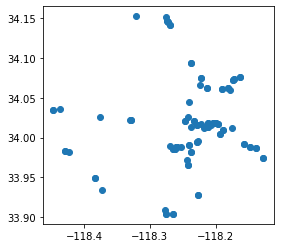

In [56]:
toxic_la_data.plot()

In [59]:
# reproject to Web Mercator
toxic_la_web_mercator = toxic_la_data.to_crs(epsg=3857)

This is a basemap plotting the location of different facilities in Los Angeles, color coded by zip code 

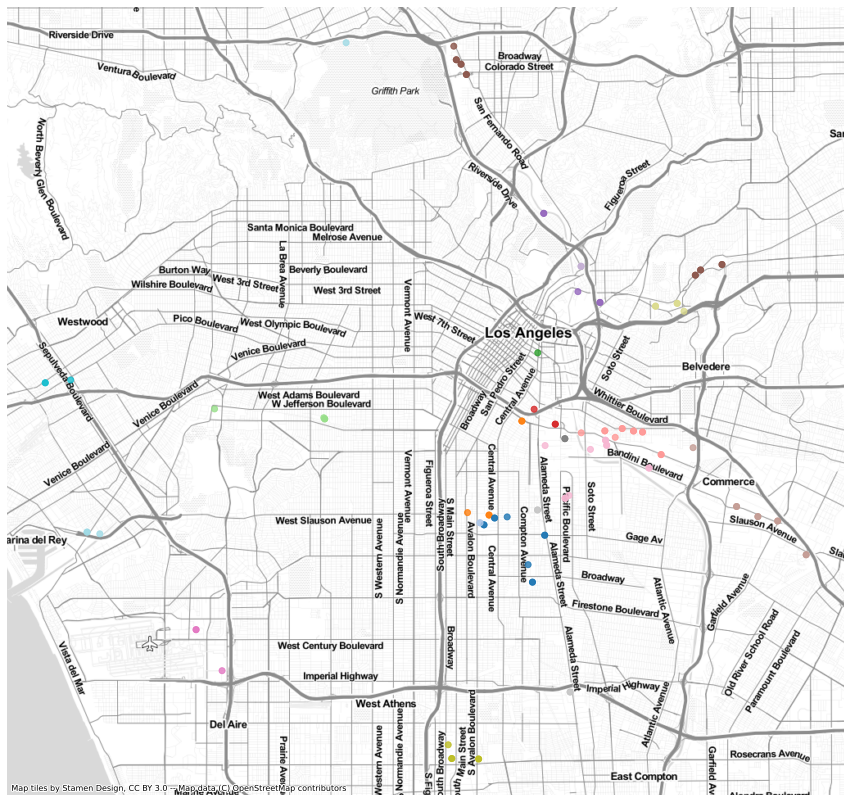

In [63]:
fig,ax = plt.subplots(figsize=(15,25))

toxic_la_web_mercator.plot(ax=ax,
                    column='zip_code',
                    cmap='tab20',
                    alpha=0.8,
                   )

# get rid of the axis
ax.axis('off');

# basemap from carto that has a dark background (easier to see)
ctx.add_basemap(ax,source=ctx.providers.Stamen.TonerLite)



I was struggling to concentrate the data to just Oxnard or Malibu because my data set did not provide data categorized for those cities, I could try and use longitude and latitude, but was unsure how to do that. I also wish that the facilities were categorized by facility type, I wanted to be able to see not just the facility value counts but facility type count, the data only provides the name of the facility and address. I will need to find a data set that describes the types, or try and define them myself.

## Looking at Centriods and Isochrone Maps

In [11]:
import networkx as nx

In [12]:
place = 'Malibu, Los Angeles, CA, USA'
network_type = 'walk'
trip_times = [5, 10, 15, 20] #in minutes
meters_per_minute = 75 # travel distance per minute

In [13]:
G = ox.graph_from_place(place, network_type=network_type)

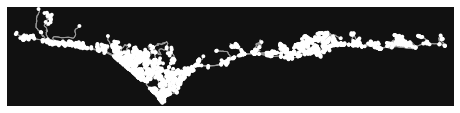

In [15]:
fig, ax = ox.plot_graph(G)

In [16]:
G = ox.project_graph(G, to_crs='epsg:3857')

In [17]:
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)

<AxesSubplot:>

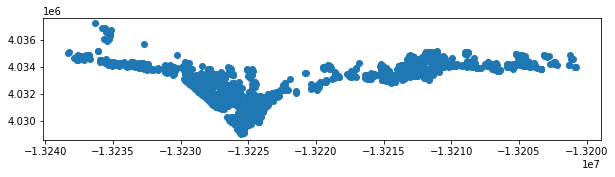

In [18]:
gdf_nodes.plot(figsize=(10,10))

In [19]:
gdf_edges.head()

osmid  oneway  highway        service   length  \
u          v          key                                                      
15970169   7340019493 0    49651538   False  service  parking_aisle   13.300   
           6792228324 0    74501028   False    trunk            NaN   10.965   
           7404007455 0    74501028   False    trunk            NaN  104.576   
7340019493 2697835679 0    49651538   False  service  parking_aisle    4.822   
           15970169   0    49651538   False  service  parking_aisle   13.300   

                                                                    geometry  \
u          v          key                                                      
15970169   7340019493 0    LINESTRING (-13211009.742 4033854.539, -132110...   
           6792228324 0    LINESTRING (-13211009.742 4033854.539, -132110...   
           7404007455 0    LINESTRING (-13211009.742 4033854.539, -132109...   
7340019493 2697835679 0    LINESTRING (-13211001.460 4033840.769, -132109...   
           15970169   0    LINESTRING (-13211001.460 4033840.769, -132110...   

                          lanes   ref                   name maxspeed bridge  \
u          v          key                                                      
15970169   7340019493 0     NaN   NaN                    NaN      NaN    NaN   
           6792228324 0       5  CA 1  Pacific Coast Highway   45 mph    NaN   
           7404007455 0       5  CA 1  Pacific Coast Highway   45 mph    NaN   
7340019493 2697835679 0     NaN   NaN                    NaN      NaN    NaN   
           15970169   0     NaN   NaN                    NaN      NaN    NaN   

                          access tunnel width  
u          v          key                      
15970169   7340019493 0      NaN    NaN   NaN  
           6792228324 0      NaN    NaN   NaN  
           7404007455 0      NaN    NaN   NaN  
7340019493 2697835679 0      NaN    NaN   NaN  
           15970169   0      NaN    NaN   NaN

In [20]:
minx, miny, maxx, maxy = gdf_nodes.geometry.total_bounds
print(minx)
print(miny)
print(maxx)
print(maxy)

-13238302.765443917
4029013.6732480526
-13200815.359189881
4037200.900621589


In [21]:
centroid_x = (maxx-minx)/2 + minx
centroid_y = (maxy-miny)/2 + miny
print(centroid_x)
print(centroid_y)

-13219559.062316898
4033107.286934821


In [22]:
center_node = ox.distance.nearest_nodes(G,Y=centroid_y,X=centroid_x)
print('The id for the nearest node is ' + str(center_node))

The id for the nearest node is 122642385


In [23]:
# what is this record?
gdf_nodes.loc[[center_node]]

,y,x,street_count,lon,lat,highway,geometry
osmid,,,,,,,
122642385,4.032883e+06,-1.321942e+07,3,-118.752052,34.030389,NaN,POINT (-13219417.926 4032883.230)


This map shows the nearest node to the centroid of Malibu

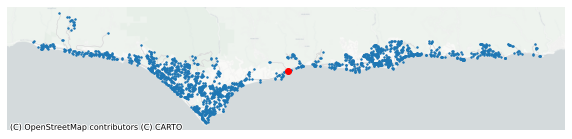

In [35]:
# set up the subplot (single plot = ax)
fig, ax = plt.subplots(figsize=(10,10))

# add the edges to ax
gdf_edges.plot(ax=ax,
               linewidth=0.5,
               edgecolor='gainsboro', 
               zorder=10)

# add all nodes to ax
gdf_nodes.plot(ax=ax, 
               markersize=2, 
               zorder=20)

# add the center node in red also to ax
gdf_nodes.loc[[center_node]].plot(ax=ax,
                                  color='r', 
                                  zorder=30)

# no axis
ax.axis('off')

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)



In [26]:
gdf_edges[['osmid','name','highway','length']].sample(5)

,,,osmid,name,highway,length
u,v,key,,,,
123453759,122812710,0,13427662,Rambla Orienta,residential,225.038
122840430,122840429,0,13323696,El Pescador Beach Road,residential,123.517
4627812791,4619128091,0,468227712,NaN,service,32.934
122407528,122407536,0,73142612,Pacific Coast Highway,trunk,24.278
123449226,7520896405,0,613579255,Malibu Canyon Road,primary,44.916


In [27]:
gdf_edges['walk_time'] = gdf_edges['length']/meters_per_minute

In [28]:
gdf_edges[['osmid','name','highway','length','walk_time']].sample(10)

,,,osmid,name,highway,length,walk_time
u,v,key,,,,,
452806184,452806183,0,38340921,NaN,service,65.291,0.870547
122617682,122617690,0,607103537,Grayfox Street,residential,66.263,0.883507
8900365237,8900362006,0,962187761,NaN,service,23.339,0.311187
884225732,3694092261,0,13317340,Zumirez Drive,service,14.292,0.190560
3781903314,3781903319,0,607103540,Cliffside Drive,residential,110.130,1.468400
884660434,8218562410,0,13449285,Bailard Road,residential,7.887,0.105160
500663285,500663297,0,41067618,NaN,service,51.095,0.681267
122723570,122509784,0,13303744,Seaboard Road,residential,386.066,5.147547
6737626750,6737626760,0,717430992,NaN,trunk_link,58.522,0.780293


<AxesSubplot:>

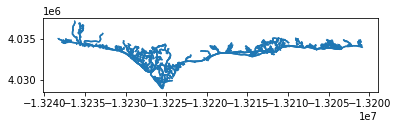

In [30]:
gdf_edges.plot()

In [31]:
# assign a color hex code for each trip time isochrone
iso_colors = ox.plot.get_colors(n=len(trip_times), 
                                cmap='inferno', 
                                start=0, 
                                return_hex=True)
print(trip_times)
print(iso_colors)

[5, 10, 15, 20]
['#000004', '#781c6d', '#ed6925', '#fcffa4']


In [32]:
# reverse the sort order so that the darker color matches longer times
trip_times.sort(reverse=True)
print(trip_times)
print(iso_colors)

[20, 15, 10, 5]
['#000004', '#781c6d', '#ed6925', '#fcffa4']


In [33]:
# create a list of "zipped" time/colors
time_color = list(zip(trip_times, iso_colors))
time_color

[(20, '#000004'), (15, '#781c6d'), (10, '#ed6925'), (5, '#fcffa4')]

In [34]:
# loop through the list of time/colors
for time,color in list(time_color):
    print('The color for '+str(time)+' minutes is ' + color)

The color for 20 minutes is #000004
The color for 15 minutes is #781c6d
The color for 10 minutes is #ed6925
The color for 5 minutes is #fcffa4


In [36]:
# loop through each trip time and associated color
for time, color in list(time_color):

    # for each trip time, create an egograph of nodes that fall within that distance
    subgraph = nx.ego_graph(G, center_node, radius=time, distance='time')

    print('There are ' + str(len(subgraph.nodes())) + ' nodes within ' + str(time) + ' minutes ')
    
    # for each of those nodes, update the gdf_nodes dataframe and assign it with its associated distance color
    for node in subgraph.nodes():
        gdf_nodes.loc[node,'time'] = str(time) + ' mins'
        gdf_nodes.loc[node,'color'] = color

There are 262 nodes within 20 minutes 
There are 173 nodes within 15 minutes 
There are 72 nodes within 10 minutes 
There are 28 nodes within 5 minutes 


In [38]:
gdf_nodes['color'].fillna('#cccccc', inplace=True)

<AxesSubplot:>

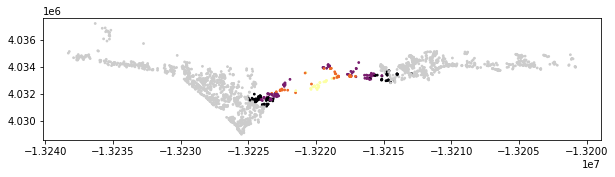

In [39]:
gdf_nodes.plot(figsize=(10,10),
               color=gdf_nodes['color'],
               markersize=3)

My maps feel really zoomed out and was unsure if it is the unfortunate shape of Malibu that causes this. Next step for my team member and I is to use isochrone mapping to show the distance between facilities and residential homes. Have some questions regarding this! 